In [810]:
#------------------------------------ASSIGNMENT-5 AVI KHANDELWAL 204102301-------------------------------------------------

#-------------------------------------------------------Q1----------------------------------------------------------------

import numpy as np
import pandas as pd
import random
from sklearn.metrics import confusion_matrix

#Reading data into pandas dataframe
data = pd.read_csv("C:/Users/avikh/Desktop/SPML_Sem1/ML/Lab/iris.data", names=["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)",'species'])

#Normalizing the Data set using minmax normalisation
data["sepal length (cm)"] = (data["sepal length (cm)"] - data["sepal length (cm)"].min())/(data["sepal length (cm)"].max() - data["sepal length (cm)"].min())
data["sepal width (cm)"] = (data["sepal width (cm)"] - data["sepal width (cm)"].min())/(data["sepal width (cm)"].max() - data["sepal width (cm)"].min())
data["petal length (cm)"] = (data["petal length (cm)"] - data["petal length (cm)"].min())/(data["petal length (cm)"].max() - data["petal length (cm)"].min())
data["petal width (cm)"] = (data["petal width (cm)"] - data["petal width (cm)"].min())/(data["petal width (cm)"].max() - data["petal width (cm)"].min())


#  SPLITTING into train and test set

# for each class, we are choosing randomly 35 out of the 50 (70 %) for training

train_setosa = random.sample(range(0, 49), 35)
train_versicolor = random.sample(range(50, 99), 35)
train_virginica = random.sample(range(100, 149), 35)

df_setosa = data.loc[train_setosa]
df_versicolor = data.loc[train_versicolor]
df_virginica = data.loc[train_virginica]

df = df_setosa.append(df_versicolor, ignore_index = True) 
df = df.append(df_virginica, ignore_index = True)

# choosing the rest 15 out of 50 for testing

test_setosa = [x for x in list(range(50)) if x not in train_setosa]
test_versicolor = [x for x in list(range(50,100)) if x not in train_versicolor]
test_virginica = [x for x in list(range(100,150)) if x not in train_virginica]

tf_setosa = data.loc[test_setosa]
tf_versicolor = data.loc[test_versicolor]
tf_virginica = data.loc[test_virginica]

tf = tf_setosa.append(tf_versicolor, ignore_index = True) 
tf = tf.append(tf_virginica, ignore_index = True)

In [811]:
# Computing Distance Metric function

def dist(d,test):
    e = np.zeros((len(d), 2)) # 2D array
    for i in range(len(d)):
        ed = np.sqrt(np.sum((d[i]-test)**2)) # Eucledian distance
        e[i][0] = ed # First element as the eucledian distance
        e[i][1] = i # Second element as the index value of the data item
    return e

In [812]:
# Computing nearest neibour function

def k_nearest(df,test,k):
    df1 = df[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)"]]
    df1 = df1.to_numpy()
    index = np.array([])
    dist_met = dist(df1,test)
    dist_met = dist_met[dist_met[:,0].argsort()] # Sorting on the basis of eucledian distance values 
    arr = dist_met[:k] # Selecting the least k eucledian distance values
    for i in range(k): # Finding out the index of the least k eucledian distance values
        index = np.append(index,arr[i][1])
    index = list(index.astype(int)) # Typecasting to int
    return df.loc[index] # Creating a new df containing the k nearest neibours of the test

In [813]:
# Prediction function using KNN

def k_predict(df,test,k):
    
    df = k_nearest(df,test,k)
    
    setosa_count=df['species'].str.contains('Iris-setosa').sum() # Counting number of setosa data items in df
    virginica_count=df['species'].str.contains('Iris-virginica').sum() # Counting number of virginica data items in df
    versicolor_count=df['species'].str.contains('Iris-versicolor').sum() # Counting number of versicolor data items in df
    
    #Finding out the highest count and declaring the predicted label 
    
    if setosa_count > virginica_count and setosa_count > versicolor_count:
        return "Iris-setosa"
    if virginica_count > setosa_count and virginica_count > versicolor_count:
        return "Iris-virginica"
    if versicolor_count > setosa_count and versicolor_count > virginica_count:
        return "Iris-versicolor"

In [818]:
# Test Use the KNN predictor, to classify the following records:
#1. [5.1, 2.5, 3.2, 4.3]
#2. [4.9, 3, 1.4, 0.2]
#3. [6, 3, 4.8, 1.8]
#Take k as 5

test1 = np.array([5.1, 2.5, 3.2, 4.3]);
test2 = np.array([4.9, 3, 1.4, 0.2]);
test3 = np.array([6, 3, 4.8, 1.8]);

test1 = (test1 - test1.min())/(test1.max() - test1.min()) # minmax normalising
test2 = (test2 - test2.min())/(test2.max() - test2.min()) # minmax normalising
test3 = (test3 - test3.min())/(test3.max() - test3.min()) # minmax normalising

print(k_predict(df,test1,5)) 
print(k_predict(df,test2,5)) 
print(k_predict(df,test3,5)) 

Iris-versicolor
Iris-setosa
Iris-versicolor


In [827]:
species = tf["species"]
tf1 = tf[["sepal length (cm)", "sepal width (cm)","petal length (cm)", "petal width (cm)"]]
tf1 = tf1.to_numpy()

for i in range(len(tf)):
    print(k_predict(df,tf1[i],11),species[i])    
    
true = np.array([])
predicted = np.array([])

for i in range(len(tf)):
    true = np.append(true,species[i])
    predicted = np.append(predicted, k_predict(df,tf1[i],11))

# Matrix 1 shows the actual number of data points classified 
matrix1 = confusion_matrix(true, predicted,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]) 


# Matrix 2 gives the normalised values and also the probability of making a correct/wrong classification decision
matrix2 = confusion_matrix(true, predicted,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],normalize='true')


print('\n',"Actual Confusion Matrix\n",matrix1,'\n')
print("Normalised Confusion Matrix\n",matrix2)

Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virgin

In [791]:
#------------------------------------------Conclusion------------------------------------------------------

# Considering k values from 3,5,7,9,11 it was found out that maximum accuracy was achieved at k=11, where prediction for setosa
# class was 100% correct, for versicolor class 93.3% correct and 93.3% correct for virginica as shown by the confusion matrix
# At k=5 where prediction for setosa class was 100% correct, for versicolor class 86.6% correct and 93.3% correct for 
# virginica. Cheking for odd values of k to avoid any ties and not taking too low values to avoid unstable decision 
# boundaries and not too high values so that samples of the other classes are not included and lead to misclassification.
# In general choosing the value of k as k =~ sqrt(N) where N stands for the number of samples in your training dataset
# here N = 105(70% of 150) so choosing k=11.

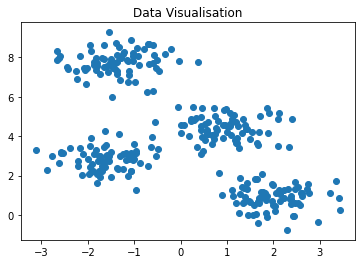

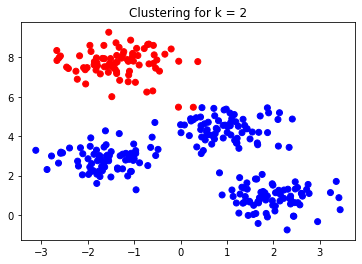

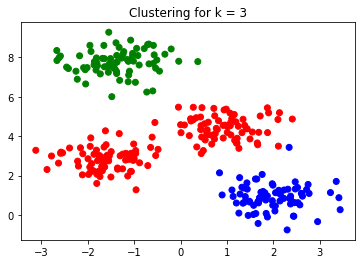

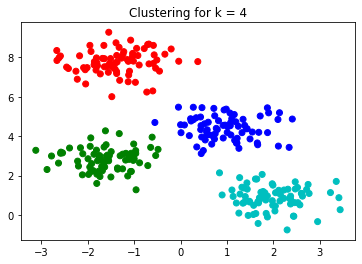

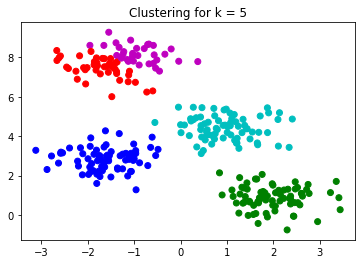

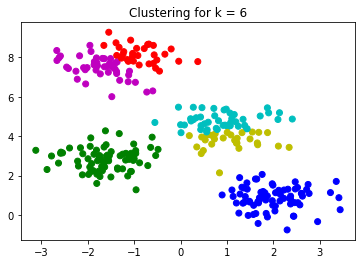

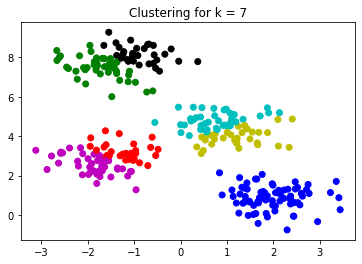

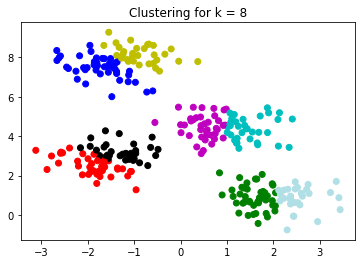

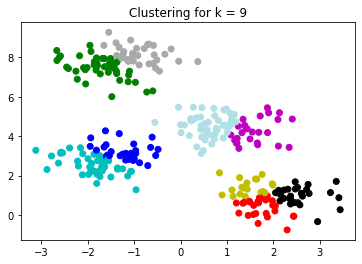

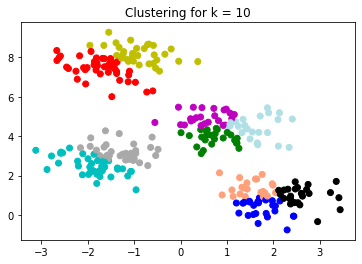

In [828]:
#-------------------------------------------------------Q2----------------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/avikh/Desktop/SPML_Sem1/ML/Lab/data_set.csv")
data =  df.drop(df.columns[0], axis=1).to_numpy() # Dropping the first column containing the serial numbers

color = np.array(['r','b','g','c','m','y','k','powderblue','darkgray','lightsalmon'])

plt.figure(1)
plt.scatter(x = df["feature1"],y = df["feature2"])
plt.title("Data Visualisation")
            
for i in range(9):
    plt.figure(i+2)
    clustering = KMeans(n_clusters=i+2)
    clustering.fit(data)
    plt.scatter(x = df["feature1"],y = df["feature2"],c = color[clustering.labels_] )
    plt.title("Clustering for k = %i" % (i+2))
    
# Best value of k = 4, where all the 4 clusters are colored differently